# Práctica de visualización de datos

En este cuaderno aprenderemos a cargar datos, hacer manipulaciones básicas, y crear visualizaciones. Un estupendo libro sobre estos temas (en inglés) es [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html). Y por supuesto la mejor forma de aprender cómo hacer alguna cosa, o cómo usar una librería concreta es mediante tu buscador favorito.

Empecemos siempre por cargar las librerías que utilizaremos:

In [1]:
import numpy as np              # librería de calculo numérico y vectorial
import pandas as pd             # librería para tratar bases de datos
import matplotlib.pyplot as plt # librería para crear visualizaciones

## Obteniendo datos

Hoy en día hay miles de bases de datos disponibles por internet. Podéis probar a buscar en los siguientes sitios:
 * [Instituto Nacional de Estadística](http://ine.es/) donde se recopilan estadísticas oficiales en España
 * [Eurostat](http://ec.europa.eu/eurostat/data/database) para estadísticas europeas
 * [Gapminder](https://www.gapminder.org/) montones de datos sobre diferentes temáticas
 * [Kaggle](https://www.kaggle.com/datasets) otra fuente de bases de datos, aquí también podéis participar en desafíos de análisis de datos.

En este cuaderno utilizaremos los datos de Eurostat sobre energía solar:
* Superficie de recolectores de energía solar [nrg_115a](http://ec.europa.eu/eurostat/web/products-datasets/-/nrg_115a), la explicación para los datos puede encontrarse [aquí](http://ec.europa.eu/eurostat/cache/metadata/en/nrg_115a_esms.htm).
* Producción de energía por tipo [ten00081](http://ec.europa.eu/eurostat/web/products-datasets/-/ten00081)

Lo primero que debemos hacer es descargar los archivos de datos en formato `tsv` y guardarlos en una carpeta adecuada. Por ejemplo:

In [2]:
# Reemplazar por la dirección en la que guardasteis los datos
surfacePath = 'datos/nrg_115a.tsv' 
productionPath ='datos/ten00081.tsv'

Después hay que cargar los datos, para ello utilizaremos `pandas` que es la librería más usada en python para analizar datos. Cada base de datos tiene sus problemas, y normalmente es necesario tratar los datos antes de poder analizarlos. Esto suele ser gran parte del tiempo de cualquier análisis de datos. Para esta base de datos vamos a utilizar la siguiente función que hará todo ese trabajo por nosotros. Puedes ignorar el código en ella de momento.

In [3]:
# Ignorar al principio
def loadSurfaceData(path):
    df = pd.read_csv(path, sep="\t")      # Leemos los datos en la tabla
    df = df.rename(columns={df.columns[0]:"index"})       # Cambiamos el nombre a la primera columna
    
    # La primera columna está formada por una cadena separada con `,` la última parte es el país que es lo
    # único que nos interesa de momento:
    df["index"] = df["index"].str.split(",").str[-1]
    df = df.set_index(["index"])                          # Elegimos los países como índice de nuestro Dataframe
    df = df.transpose().reset_index()                     # Transponemos el dataframe, y convertimos el índice
                                                          # (que ahora está formado por años) en una columna
    df = df.rename(columns={df.columns[0]:"year"})        # Cambiamos el nombre a esta columna
    
    # La tabla contiene algunas entradas con el símbolo `:`, suponemos que para indicar que no hay datos
    # Por ello pandas interpreta las columnas como cadenas (string), con este bucle convertimos todas las
    # entradas en numérico, transformando los `:` en NaN (Not a Number), que son más cómodos para trabajar.
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    df = df.sort_values("year")  # Finalmente ordenamos el dataframe por años                         
    df = df.set_index(["year"])  # Y establecemos los años como índice de nuevo
    return df

In [4]:
# Así cargamos los datos limpiamente
surfaceData = loadSurfaceData(surfacePath)

Ahora que tenemos los datos de superficie de recolectores instalados es hora de observar los datos.

In [5]:
surfaceData.head()

index,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PT,RO,RS,SE,SI,SK,TR,UA,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
1990,0,461,0,34,0,NaN,0,348,57,3494,...,150,0,0,90,0,0,0,0,205,NaN
1991,0,584,0,36,0,NaN,0,478,69,3972,...,170,0,0,10,0,0,0,0,216,NaN
1992,0,724,0,36,0,NaN,0,594,85,4434,...,178,0,0,110,0,0,0,0,225,NaN
1993,0,873,0,36,0,NaN,0,762,103,4921,...,185,0,0,118,0,0,0,0,235,NaN
1994,0,1037,0,36,0,NaN,0,957,124,5430,...,193,0,0,125,0,0,0,0,243,NaN


Podemos ver las dimensiones de nuestro dataframe con `shape`

In [6]:
surfaceData.shape

(27, 42)

_Preguntas:_
- ¿Cuántos años hay disponibles en la base de datos?
- ¿En qué unidades están los datos?
- ¿A qué países corresponden las columnas de los datos?
- ¿Cuántos países hay representados en los datos?
- ¿Qué ocurre si sumas un número y un NaN?

### La regla de oro para Jupyter Notebook

[Jake VanderPlas](https://jakevdp.github.io/) dice que la regla de oro para trabajar con Jupyter Notebook es utilizar la opción `Restart & Run All` en el menú `Kernel` una vez terminamos de modificar nuestro cuaderno. Si todas las celdas se ejecutan sin dar errores podemos quedar bastante tranquilos. Nunca dejes un cuaderno a medias sin aplicar esta regla, te salvará muchos quebraderos de cabeza.

## Explorando los datos

Otra pregunta: ¿Qué país tiene más superficie de receptores instalada en el año 2016?

Veamos como podemos resolver esta pregunta, en primer lugar necesitamos los datos del año 2016 que podemos obtener de la siguiente manera:

In [7]:
data2016 = surfaceData.loc[2016]
data2016.sort_values(ascending=False).head()

index
EU28    50070.0
EA19    43217.0
TR      20080.0
DE      19122.0
AT       5210.0
Name: 2016, dtype: float64

Podemos ver que los primeros lugares no son para un país sino para uniones de varios: La Union Europea (28 países), y la Zona Euro (19 países). En cuanto a países individuales, los que tienen mayor superficie instalada son Turquía (TR), Alemania (DE) y Austria (AT)

- ¿Podrías obtener los países con menos superficie instalada?
- ¿Y sólo entre países de la UE28?

Veamos como calcular estadísticas básicas con estos datos. En primer lugar, vamos a desacernos de las columnas que no corresponden a países, para evitar producir resultados absurdos:

In [8]:
countrySurfaceData = surfaceData.drop(["EU28", "EA19"],1)

En segundo lugar vamos a calcular estadísticas entre países para años concretos, así que nos interesa el dataframe transpuesto:

In [9]:
surfaceDataByCountry = countrySurfaceData.transpose()

Calculamos el máximo, el mínimo, la media, y la desviación estandar de la superficie en el año 2015

In [10]:
surfaceDataByCountry[2015].max()

19690.0

In [11]:
surfaceDataByCountry[2015].min()

0.0

In [12]:
surfaceDataByCountry[2015].mean()

1748.871794871795

In [13]:
surfaceDataByCountry[2015].std()

4304.020508287858

## Visualizando datos

Podemos ver que hay muchísima variedad entre los países. Tanta que la media puede no ser representativa. Podemos comprobar esto dibujando un histograma con estos datos (aunque hay otras formas de verlo):

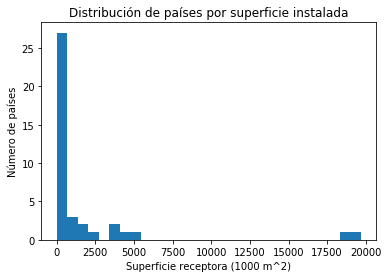

In [14]:
bins = np.linspace(0, surfaceDataByCountry[2015].max(), num=30)

plt.hist(surfaceDataByCountry[2015].dropna(), bins=bins)
plt.title("Distribución de países por superficie instalada")
plt.xlabel("Superficie receptora (1000 m^2)")
plt.ylabel("Número de países")
plt.show()

Podemos ver que la mayoría de los países tienen muy poca superficie, y hay un par de ellos que tienen mucho más que los demás.

* ¿Es representativa la media de la superficie instalada entre países?

Veamos ahora otro tipo de visualización. ¿Cómo evolucionó la instalación de receptores solares en diversos países? Podemos utilizar el siguiente código para verlo.

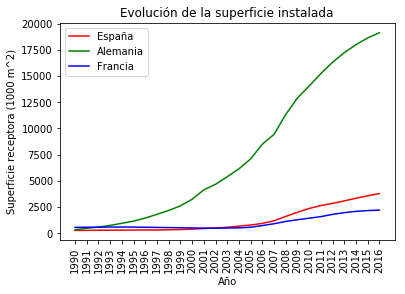

In [15]:
plt.plot(surfaceData["ES"], color="red", label="España")
plt.plot(surfaceData["DE"], color="green", label="Alemania")
plt.plot(surfaceData["FR"], color="blue", label="Francia")
plt.xticks(surfaceData.index, rotation="vertical")
plt.title("Evolución de la superficie instalada")
plt.xlabel("Año")
plt.ylabel("Superficie receptora (1000 m^2)")
plt.legend()
plt.show()

* Intenta dibujar la evolución de superficie instalada en Austria y la Unión Europea

## Visualizando varias variables a la vez

Veamos a continuación como visualizar la relación entre varias variables. De momento sólo disponemos de la superficie instalada. Obtengamos a continuación la energía solar producida por cada país:

In [16]:
def loadSolarProductionData(path):
    energyByType = pd.read_csv(path, sep="\t", index_col=0)
    energyByType.index = pd.MultiIndex.from_tuples(energyByType.index.str.split(",").tolist())
    total = energyByType.reset_index()
    # Estos son los dos tipos de energía solar térmica y fotovoltáica
    solar = total[(total["level_1"] == "5534") | (total["level_1"] == "5532")]
    solar = solar.drop(["level_0", "level_1", "level_2"], 1)
    solar = solar.rename(columns={"level_3":"index"}).set_index("index")
    solar = solar.transpose().reset_index()
    solar["index"] = pd.to_numeric(solar["index"])
    solar = solar.set_index("index").transpose()
    for col in solar.columns:
        solar[col] = pd.to_numeric(solar[col], errors='coerce')
    # De esta forma agregamos la energía solar y fotovoltáica
    solar = solar.reset_index().groupby("index").sum()
    return solar.transpose()

In [17]:
solarProduction = loadSolarProductionData(productionPath)

In [18]:
solarProduction.head()

index,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PT,RO,RS,SE,SI,SK,TR,UA,UK,XK
index,,,,,,,,,,,,,,,,,,,,,
2005,2.3,90.3,0.0,2.8,0.0,41.3,2.5,370.8,10.2,773.2,...,22.7,0.0,0.0,6.1,0.0,0.0,384.8,0.0,30.1,0.2
2006,2.3,99.6,0.0,3.4,0.0,43.4,3.2,496.1,10.6,955.6,...,24.0,0.0,0.0,6.0,0.0,0.0,402.4,0.0,37.2,0.2
2007,6.3,105.7,0.0,5.1,0.0,53.6,4.0,603.2,11.6,1217.2,...,27.7,0.0,0.0,8.9,0.0,0.0,419.9,0.0,46.1,0.2
2008,6.5,117.0,0.0,9.5,0.0,56.3,6.0,766.1,12.6,1673.1,...,33.7,0.0,0.0,9.8,0.1,0.0,420.0,0.0,31.0,0.2
2009,6.6,127.9,0.0,25.4,0.3,58.2,14.0,1020.1,14.4,2436.7,...,48.7,0.1,0.0,10.5,7.9,0.0,428.8,0.0,34.9,0.2


Podemos ver que obtenemos una tabla similar a la que ya teníamos, esta vez con la producción de energía solar en cada país y cada año. 

* ¿En qué unidades están estos datos?

Veamos cual es la relación entre superficie instalada y producción en el año 2016. Para ello primero tenemos que quedarnos al igual que antes sólo con los datos de países.

In [19]:
countrySolarProduction = solarProduction.drop(["EU28", "EA19"], 1)

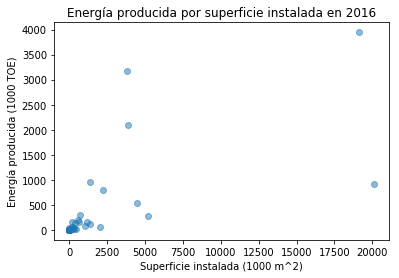

In [20]:
plt.scatter(countrySurfaceData.loc[2016], countrySolarProduction.loc[2016], alpha=0.5)
plt.title("Energía producida por superficie instalada en 2016")
plt.xlabel("Superficie instalada (1000 m^2)")
plt.ylabel("Energía producida (1000 TOE)")
plt.show()

* ¿Sabrías decir cuales son los dos países a la derecha del gráfico?
* ¿Dirías que existe una relación entre ambas variables?
* ¿Qué otras visualizaciones serían interesantes de hacer con estos datos?

Finalizaremos esta práctica calculando la correlación entre las dos variables:

In [21]:
countrySurfaceData.loc[2016].corr(countrySolarProduction.loc[2016])

0.674601559153672

* ¿Cómo interpretarías este resultado?

Podemos compararlo con otras correlaciones:

In [22]:
countrySurfaceData.loc[2016].corr(countrySurfaceData.loc[2016])

0.9999999999999998

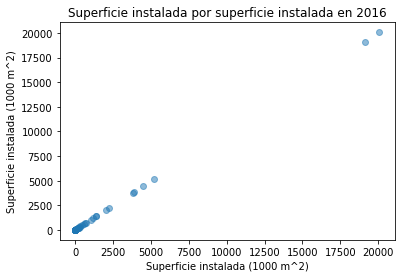

In [23]:
plt.scatter(countrySurfaceData.loc[2016], countrySurfaceData.loc[2016], alpha=0.5)
plt.title("Superficie instalada por superficie instalada en 2016")
plt.xlabel("Superficie instalada (1000 m^2)")
plt.ylabel("Superficie instalada (1000 m^2)")
plt.show()

In [24]:
countrySurfaceData.loc[1990].corr(countrySurfaceData.loc[2016])

0.27333379636764904

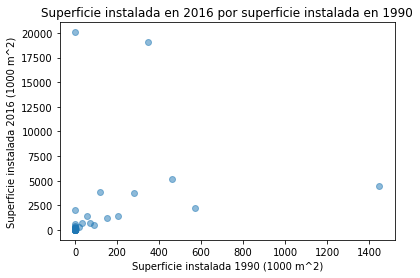

In [25]:
plt.scatter(countrySurfaceData.loc[1990], countrySurfaceData.loc[2016], alpha=0.5)
plt.title("Superficie instalada en 2016 por superficie instalada en 1990")
plt.xlabel("Superficie instalada 1990 (1000 m^2)")
plt.ylabel("Superficie instalada 2016 (1000 m^2)")
plt.show()

In [26]:
countrySurfaceData.loc[2000].corr(countrySurfaceData.loc[2016])

0.904557177447557

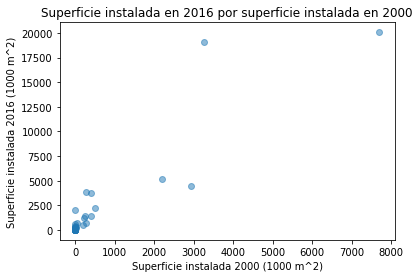

In [27]:
plt.scatter(countrySurfaceData.loc[2000], countrySurfaceData.loc[2016], alpha=0.5)
plt.title("Superficie instalada en 2016 por superficie instalada en 2000")
plt.xlabel("Superficie instalada 2000 (1000 m^2)")
plt.ylabel("Superficie instalada 2016 (1000 m^2)")
plt.show()

In [28]:
randomNumbers = pd.Series(np.random.randn(len(countrySurfaceData.loc[2016])), index=countrySurfaceData.loc[2016].index)
countrySurfaceData.loc[2016].corr(randomNumbers)

-0.14472667940498152

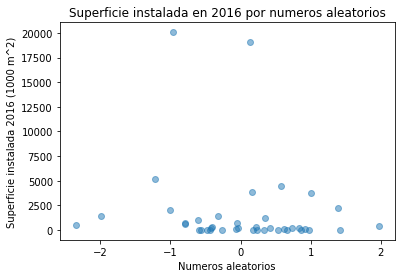

In [29]:
plt.scatter(randomNumbers, countrySurfaceData.loc[2016], alpha=0.5)
plt.title("Superficie instalada en 2016 por numeros aleatorios")
plt.xlabel("Numeros aleatorios")
plt.ylabel("Superficie instalada 2016 (1000 m^2)")
plt.show()

Ahora ya dispones de las herramientas básicas para cargar datos en tu ordenador y empezar a hacer visualizaciones. Así que adelante:

* Busca una base de datos que te interese, descárgala y crea tus propias visualizaciones.

No olvides la Regla de oro una vez termines ;)